In [15]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
dataset = pd.read_csv("preProcessedData.csv")
print(dataset.shape)


(706, 21)


In [17]:
dataset.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Bod_mass_index,Absenteeism
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [18]:
#Split dataset into input variable X and target y

X = dataset.drop(['Absenteeism'], axis=1)

X.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Bod_mass_index
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30


In [19]:
y = dataset.Absenteeism
print(y[0:10])

0     4
1     0
2     2
3     4
4     2
5     2
6     8
7     4
8    40
9     8
Name: Absenteeism, dtype: int64


In [20]:
#Split the dataset into training and testing test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#The size of the input training set
print(X_train.shape)

(473, 20)


In [21]:
#Construct Decision Tree 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [22]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Accuracy
print("Accuracy is: ", metrics.accuracy_score(y_test, y_pred))

Accuracy is:  0.38197424892703863


In [23]:
#Tune the decision tree model

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Train DTC
clf = clf.fit(X_train, y_train)

#Predict
y_pred = clf.predict(X_test)

#Accuracy
print("Accuracy is: ", metrics.accuracy_score(y_test, y_pred))

Accuracy is:  0.4721030042918455


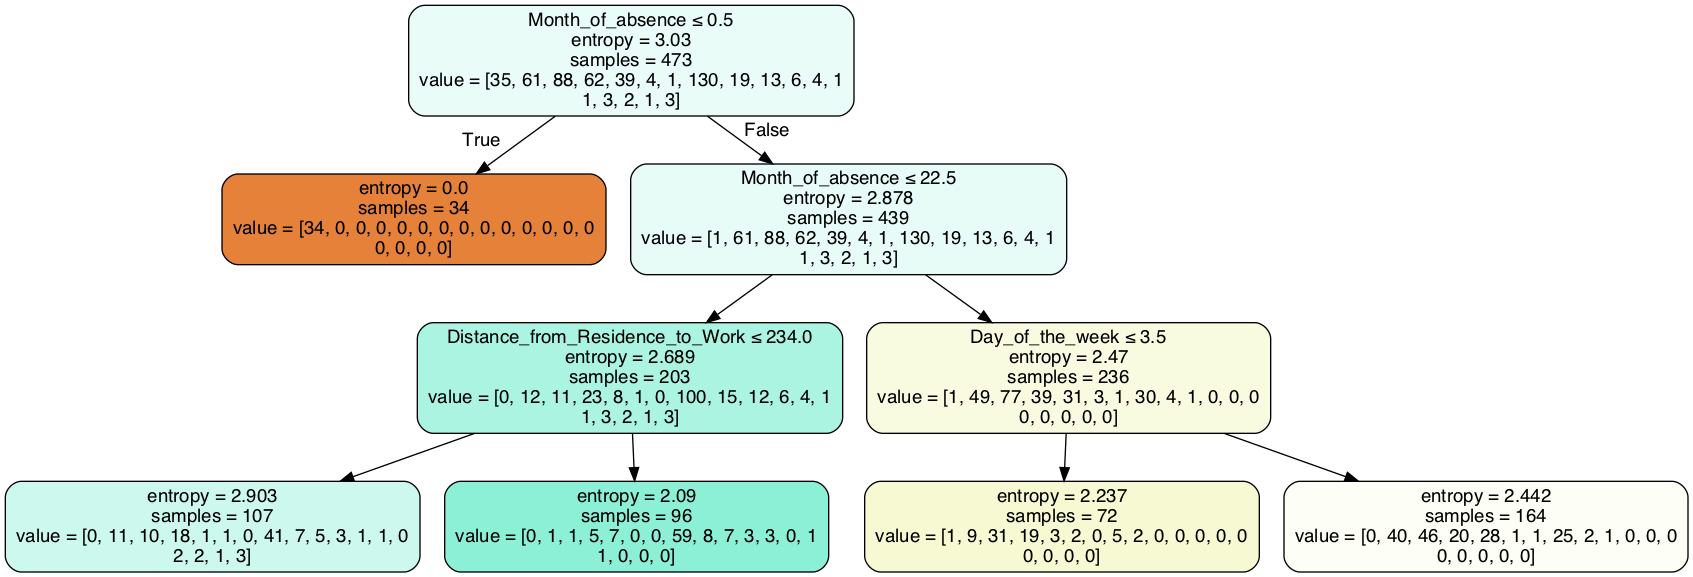

In [24]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Reason_for_absence',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Work_load_Average/day ',
 'Hit_target',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet',
 'Weight',
 'Height',
 'Bod_mass_index',
 'Absenteeism']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
    special_characters=True, 
    feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())